<a href="https://colab.research.google.com/github/YinYinTan/CIND820FinalProject/blob/main/1_Data_Transformation_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Transformation

Initial exploratory data analysis of the original Public Use Microdata File (PUMF) dataset was conducted by reviewing the descriptive statistics provided in Statistics Canada's Data Dictionary document that accompanied the PUMF. The Data Dictionary listed all variables in the PUMF dataset, along with the answer categories (i.e. classes), codes utilized for each category, response frequencies, and percentages. 

After examination of the Data Dictionary and the questionnaire used to gather responses, decisions were made on the appropriate process to clean and transform the data to remove irrelavant variables, delete invalid responses, and address missing values. The remainder of this section contains the code for this process.

In [34]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

!pip3 install pandas_profiling --upgrade

In [35]:
#Read file
df = pd.read_csv('HS.csv', index_col=None)

In [36]:
#Drop rows containing observations that are not valid for the project
df.drop(df[df['EMP_30'] != 1].index, inplace = True)
df.drop(df[df['GEN_10'] == 9].index, inplace = True)
df.drop(df[df['GEN_15'] == 9].index, inplace = True)

In [37]:
#Create new derived variable, which will be the target variable for this project
df['Worse_MH'] = np.where((df['GEN_10'] >= 4) & (df['GEN_15'] >= 4), 0, 1)

In [38]:
#Drop columns pertaining to variables that are not needed for the project
df = df.drop(columns=['PUMFID','VERDATE','EMP_05','BMF_P','EMP_30','ENV_25A','ENV_25B','ENV_25C','GEN_10','GEN_15'])

#Drop columns pertaining to derived variables that are not needed for the project
df = df.drop(columns=['PPEDVEY1','PPEDVEY2','PPEDVFV1','PPEDVFV2','PPEDVGL1','PPEDVGL2','PPEDVGN1','PPEDVGN2','PPEDVHS1','PPEDVHS2','PPEDVMA1','PPEDVMA2',\
                      'PPEDVOT1','PPEDVOT2','PPEDVRE1','PPEDVRE2','PPEDVRS1','PPEDVRS2','GENDVHDI','GENDVMHI'])

In [39]:
#Reassignment of "Valid Skip" class, for variables pertaining to questions that were not asked of respondents based on their previous responses

#If ENV_30 = “Valid Skip” = 6, then reassign to “No” = 2
df['ENV_30'].mask(df['ENV_30'] == 6, 2, inplace=True)

#If PPE_10 = “No” = 2, then PPE_15A, PPE_15B, PPE_15C, PPE_15D, PPE_15E, PPE_15F, PPE_15G, PPE_15H, PPE_15I, and PPE_15J = “No” = 2 (instead of "Valid Skip")
skip_set_1 = ['PPE_15A','PPE_15B','PPE_15C','PPE_15D','PPE_15E','PPE_15F','PPE_15G','PPE_15H','PPE_15I','PPE_15J']
df[skip_set_1] = np.where(df[['PPE_10']] == 2, 2, df[skip_set_1])

#If PPE_20 = “No” = 2, then PPE_30A, PPE_30B, PPE_30C, PPE_30D, PPE_30E, PPE_30F, PPE_30G, PPE_30H,...
#PPE_35A, PPE_35B, PPE_35C, PPE_35D, PPE_35E, PPE_35F, PPE_35G, PPE_35H = "Not needed for job" = 1 (instead of "Valid Skip")
skip_set_2 = ['PPE_30A','PPE_30B','PPE_30C','PPE_30D','PPE_30E','PPE_30F','PPE_30G','PPE_30H','PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H']
df[skip_set_2] = np.where(df[['PPE_20']] == 2, 1, df[skip_set_2])

#If PPE_20 = “No” = 2, then PPE_25, PPE_40A, PPE_40B, PPE_40C, PPE_40D, PPE_40E, PPE_40F, PPE_40G, PPE_40H, PPE_40I,...
#PPE_45A, PPE_45B, PPE_45C, PPE_45D, PPE_45E, PPE_45F, PPE_45G, PPE_45H, PPE_45I = "No" = 2 (instead of "Valid Skip")
skip_set_3 = ['PPE_25','PPE_40A','PPE_40B','PPE_40C','PPE_40D','PPE_40E','PPE_40F','PPE_40G','PPE_40H','PPE_40I','PPE_45A',\
              'PPE_45B','PPE_45C','PPE_45D','PPE_45E','PPE_45F','PPE_45G','PPE_45H','PPE_45I']
df[skip_set_3] = np.where(df[['PPE_20']] == 2, 2, df[skip_set_3])

In [40]:
#Reassignment of "Not stated" class (i.e. missing value category), for variables pertaining to questions that respondents did not answer

#If response to PPE access question = “Not stated” = 9, then update to "Not needed for job" = 1
missing_set_1 = ['PPE_30A','PPE_30B','PPE_30C','PPE_30D','PPE_30E','PPE_30F','PPE_30G','PPE_30H','PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H']
for col in missing_set_1:
  df[col].mask(df[col] == 9, 1, inplace=True)

#If response to PPE restriction question = “Not stated” = 9, then update to "No" = 2
missing_set_2 = ['PPE_40A','PPE_40B','PPE_40C','PPE_40D','PPE_40E','PPE_40F','PPE_40G','PPE_40H','PPE_40I',\
                 'PPE_45A','PPE_45B','PPE_45C','PPE_45D','PPE_45E','PPE_45F','PPE_45G','PPE_45H','PPE_45I']
for col in missing_set_2:
  df[col].mask(df[col] == 9, 2, inplace=True)

#If response to PPE or IPC protocol/practice question = “Not stated” = 9, then remove from dataset
df.drop(df[(df['PPE_05'] == 9)|(df['PPE_10'] == 9)|(df['PPE_15A'] == 9)|(df['PPE_15B'] == 9)|(df['PPE_15C'] == 9)|(df['PPE_15D'] == 9)|(df['PPE_15E'] == 9)|\
           (df['PPE_15F'] == 9)|(df['PPE_15G'] == 9)|(df['PPE_15H'] == 9)|(df['PPE_15I'] == 9)|(df['PPE_15J'] == 9)].index, inplace = True)
df.drop(df[(df['PPE_20'] == 9)|(df['PPE_25'] == 9)].index, inplace = True)
df.drop(df[(df['PPE_50A'] >= 96)|(df['PPE_50B'] >= 96)|(df['PPE_50C'] >= 96)|(df['PPE_50D'] >= 96)|(df['PPE_50E'] >= 96)|(df['PPE_50F'] >= 96)].index, inplace = True)

#Handling of 15/16 remaining variables with classes of "Not stated" = 9: Reassign to most frequent value
missing_set_3 = ['EMP_10','EMP_35','EMP_45','EMPDVGOC','ENV_30','ENVDVCON','ENVDVTYP','ENVDVGRW','GEN_05','GEN_20','AGEDVG4','GDRDVGRP','ISDVFLAG','PGDVFLA','IMMDVGST']
for col in missing_set_3:
  frequent = df[col].mode()
  df[col].mask(df[col] == 9, frequent[0], inplace=True)

In [41]:
#Change all variables to categorical or else they will be considered numeric
#df = df.astype('category')

In [42]:
#View basic summary of variables
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17319 entries, 0 to 18138
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   GEODVGPR  17319 non-null  int64
 1   EMP_10    17319 non-null  int64
 2   EMP_35    17319 non-null  int64
 3   EMP_45    17319 non-null  int64
 4   EMPDVGOC  17319 non-null  int64
 5   EMPDVGYW  17319 non-null  int64
 6   ENV_30    17319 non-null  int64
 7   ENVDVCON  17319 non-null  int64
 8   ENVDVTYP  17319 non-null  int64
 9   ENVDVGRW  17319 non-null  int64
 10  PPE_05    17319 non-null  int64
 11  PPE_10    17319 non-null  int64
 12  PPE_15A   17319 non-null  int64
 13  PPE_15B   17319 non-null  int64
 14  PPE_15C   17319 non-null  int64
 15  PPE_15D   17319 non-null  int64
 16  PPE_15E   17319 non-null  int64
 17  PPE_15F   17319 non-null  int64
 18  PPE_15G   17319 non-null  int64
 19  PPE_15H   17319 non-null  int64
 20  PPE_15I   17319 non-null  int64
 21  PPE_15J   17319 non-null  int64
 22

,GEODVGPR,EMP_10,EMP_35,EMP_45,EMPDVGOC,EMPDVGYW,ENV_30,ENVDVCON,ENVDVTYP,ENVDVGRW,PPE_05,PPE_10,PPE_15A,PPE_15B,PPE_15C,PPE_15D,PPE_15E,PPE_15F,PPE_15G,PPE_15H,PPE_15I,PPE_15J,PPE_20,PPE_25,PPE_30A,PPE_30B,PPE_30C,PPE_30D,PPE_30E,PPE_30F,PPE_30G,PPE_30H,PPE_35A,PPE_35B,PPE_35C,PPE_35D,PPE_35E,PPE_35F,PPE_35G,PPE_35H,PPE_40A,PPE_40B,PPE_40C,PPE_40D,PPE_40E,PPE_40F,PPE_40G,PPE_40H,PPE_40I,PPE_45A,PPE_45B,PPE_45C,PPE_45D,PPE_45E,PPE_45F,PPE_45G,PPE_45H,PPE_45I,PPE_50A,PPE_50B,PPE_50C,PPE_50D,PPE_50E,PPE_50F,GEN_05,GEN_20,AGEDVG4,GDRDVGRP,ISDVFLAG,PGDVFLA,IMMDVGST,Worse_MH
count,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000,17319.000000
mean,32.503089,1.816213,1.256135,1.355506,4.363300,2.931405,1.705699,1.688839,5.320861,32.976327,1.172758,1.045326,1.103470,1.126797,1.235118,1.126047,1.245107,1.201109,1.408049,1.256655,1.830995,1.455107,1.029390,1.207922,1.996420,2.147237,2.055199,2.015936,2.204400,2.187424,2.169005,1.358104,1.964317,2.062763,1.955829,1.929153,2.087418,2.084531,2.094578,1.385704,1.555286,1.585946,1.817888,1.721866,1.981004,1.860904,1.913621,1.889486,1.724926,1.718171,1.702408,1.869507,1.824182,1.989376,1.922340,1.955078,1.944223,1.584964,2.152665,2.285871,2.739708,2.423466,3.582597,2.713783,2.234771,3.585715,2.325077,1.884347,1.985334,1.900918,1.106415,0.688781
std,12.930343,0.387321,0.436510,0.631951,3.748627,2.563621,0.455741,0.580218,16.495157,13.950737,0.413782,0.208024,0.304581,0.332755,0.424084,0.331911,0.430163,0.400841,0.491486,0.436800,0.374767,0.497995,0.168901,0.405832,0.542659,0.509328,1.157462,0.782636,0.892619,0.962384,0.526924,0.748214,0.511669,0.441311,1.081376,0.718170,0.825790,0.896872,0.485562,0.742032,0.496948,0.492572,0.385948,0.448093,0.136516,0.346056,0.280931,0.313539,0.446564,0.449904,0.457212,0.336854,0.380677,0.102528,0.267644,0.207138,0.229497,0.492742,1.175803,1.179365,1.278799,1.180751,1.559158,1.474662,0.952426,0.818163,1.082673,0.319818,0.120215,0.298781,0.308377,0.463005
min,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000

The initial working dataset has 72 categorical variables with 17,319 observations.


# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [12]:
profile = ProfileReport(df)
profile.to_file(output_file="2. Dataset Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/pivot.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agged[v] = maybe_downcast_to_dtype(agged[v], data[v].dtype)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The Dataset Profile confirms the initial working dataset has no missing or invalid values. 

Of the 72 categorical variables, 5 are nominal, 39 are nominal and dichotomous (i.e. contain only 2 classes), and 28 are ordinal.

The distribution in the bar chart for each variable was examined. When a distribution is too skewed, such as when there is only one dominant bar and the other categories are present in very low numbers, this is often not helpful in machine learning. Several considerations for feature selection were identified.
*   ISDVFLAG is a variable with only 2 classes, and 98.5% of responses fall into 1 class. Hence, this variable could potentially be removed as it will not contribution information that will be useful for prediction.
*   ???

## Bivariate Analysis: Correlation Analysis

               GEODVGPR        EMP_10  ...       IMMDVGST      Worse_MH
GEODVGPR   0.000000e+00  1.988087e-02  ...  1.152157e-146  4.121359e-23
EMP_10     3.122459e-14  0.000000e+00  ...   5.655373e-02  7.895896e-04
EMP_35     2.449724e-08  8.255549e-17  ...   2.818904e-01  5.402822e-02
EMP_45     6.899158e-03  1.711784e-09  ...   2.056065e-01  1.025232e-01
EMPDVGOC  6.699920e-156  7.808614e-19  ...   5.259953e-03  5.315393e-15
...                 ...           ...  ...            ...           ...
GDRDVGRP   9.905376e-01  1.233187e-05  ...   3.074764e-01  1.752695e-01
ISDVFLAG   9.826470e-01  7.947676e-01  ...   6.364247e-01  7.982007e-01
PGDVFLA    8.328188e-04  6.424996e-01  ...   1.532899e-55  7.205480e-01
IMMDVGST   8.767871e-09  5.177084e-02  ...   0.000000e+00  2.086712e-01
Worse_MH   2.573094e-02  7.254930e-11  ...   1.673785e-02  0.000000e+00

[72 rows x 72 columns]


Text(0.5, 1.0, 'Chi-Squared Test Results')

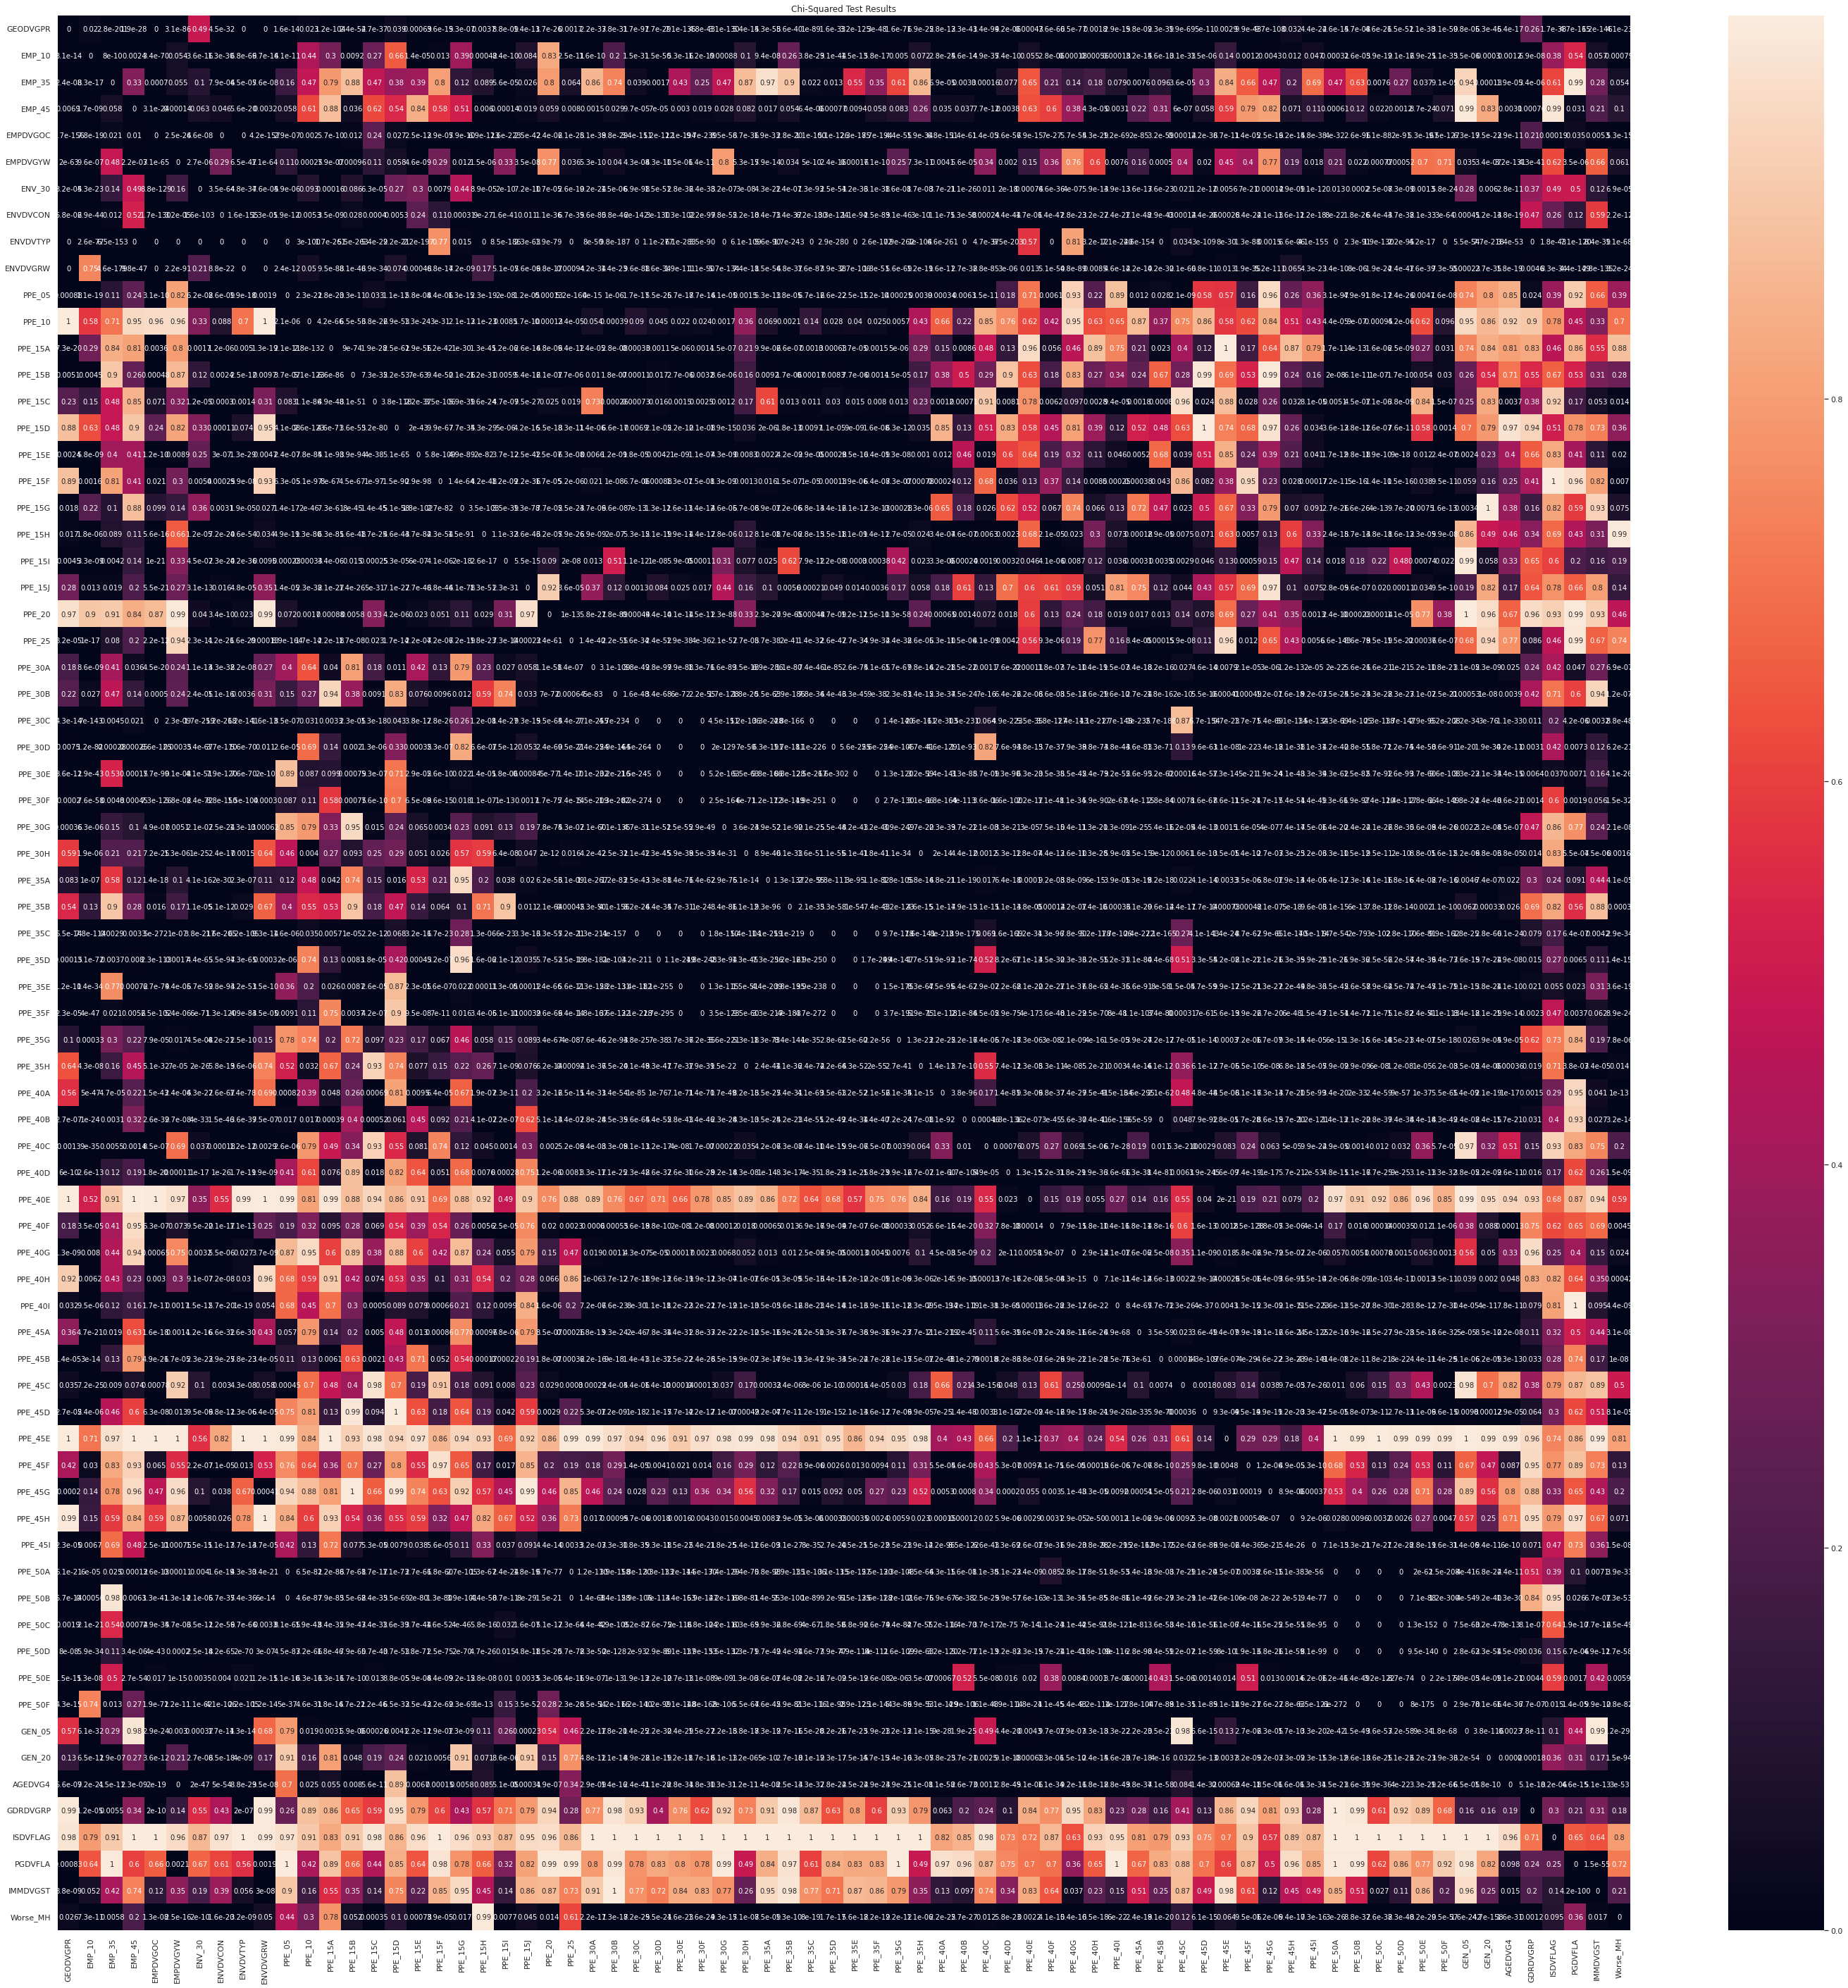

In [95]:
#Chi-squared tests for all variable pairs

from sklearn.feature_selection import chi2

resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
          chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
          resultant.loc[i,j] = p_val
print(resultant)

fig = plt.figure(figsize=(50,50))
sns.heatmap(resultant, annot=True)
plt.title('Chi-Squared Test Results')
plt.show()

The heatmap provided some useful information to consider as part of feature selection:
*   The ISDVFLAG variable is not correlated with all other variables. This confirms the previous conclusion that it could be removed from the dataset as part of feature selection.
*   The variables PPE_45E and PPE_40E had similar profiles, in that they are not correlated with other variables, except for variable sets PPE_40* and PPE_45*. This may indicate that using both PPE_45E and PPE_40E variables may not be required in the classification model, and just one may be sufficient.

Focusing on the correlation coefficients between the target variable Worse_MH and other variables:
PPE_15H had the highest correlation coefficient at 0.96.




<Figure size 1440x1440 with 0 Axes>

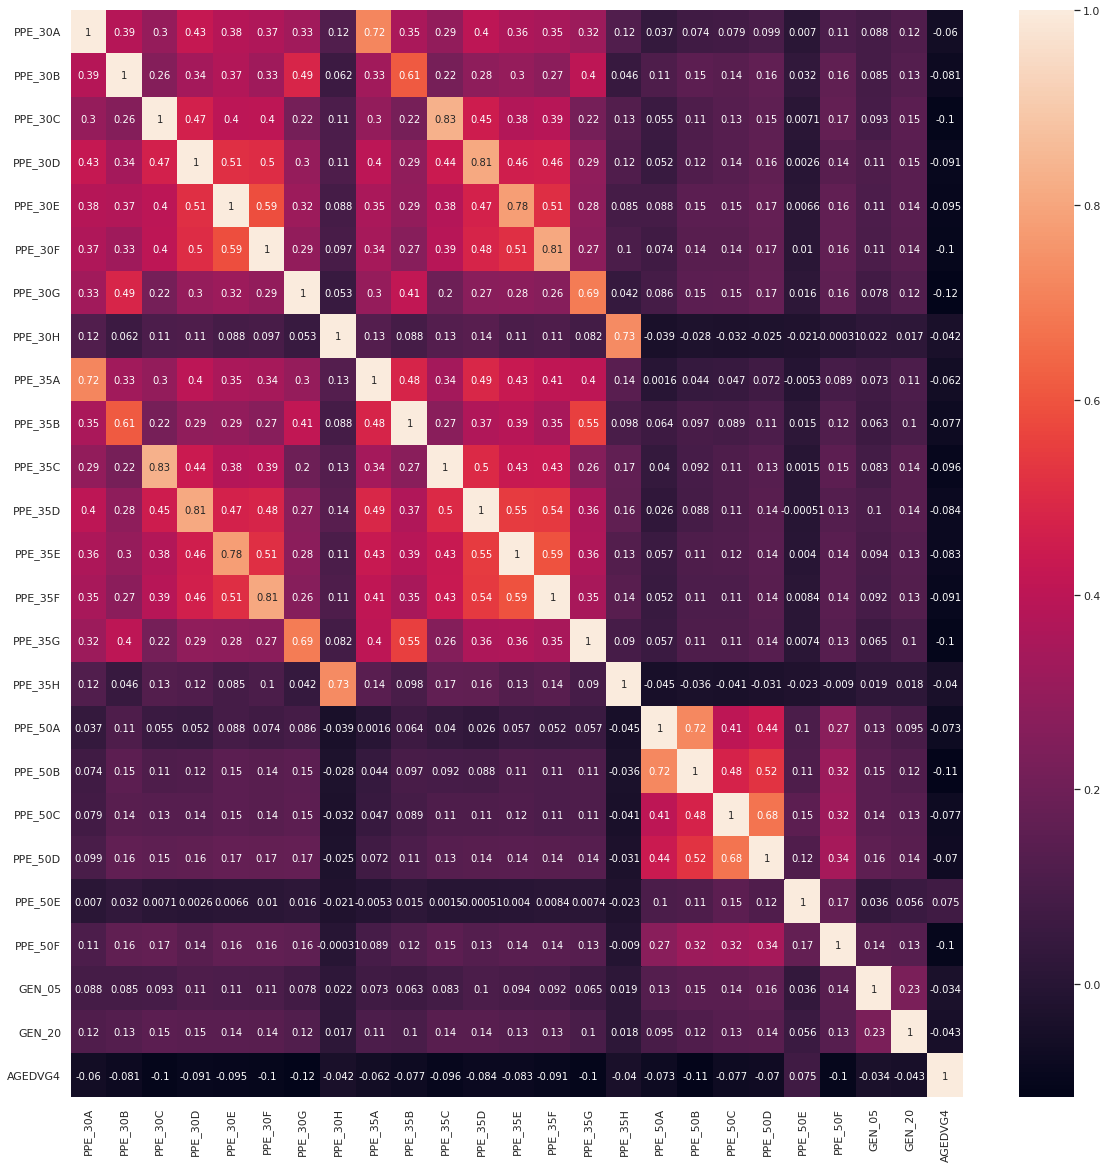

In [87]:
#Kendall rank correlation for all 28 ordinal variable pairs

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ord_var = ['PPE_30A','PPE_30B','PPE_30C','PPE_30D','PPE_30E','PPE_30F','PPE_30G','PPE_30H','PPE_35A','PPE_35B','PPE_35C','PPE_35D','PPE_35E','PPE_35F','PPE_35G','PPE_35H',\
           'PPE_50A','PPE_50B','PPE_50C','PPE_50D','PPE_50E','PPE_50F','GEN_05','GEN_20','AGEDVG4']
plt.figure(figsize=(20,20))
corr_mat = df[ord_var].corr(method="kendall")
sns.heatmap(corr_mat, annot=True)

The top 8 correlation coefficients occurr between PPE_35* and PPE_30* variables:
*   PPE_35C and PPE_30C have the highest correlation coefficient of 0.83.
*   PPE_35D and PPE_30D, and also PPE_35F and PPE_30F, have the second highest correlation coefficients of 0.81.
*   PPE_35E and PPE_30E have the third highest correlation coefficient of 0.78.
*   PPE_35H and PPE_30H have the fourth highest correlation coefficient of 0.73.
*   PPE_35A and PPE_30A have the fifth highest correlation coefficient of 0.72.
*   PPE_35G and PPE_30G have the fifth highest correlation coefficient of 0.69.
*   PPE_35B and PPE_30B have the fifth highest correlation coefficient of 0.61.

The above results indicate that using both PPE_35* variables and PPE_30* variables may not be required in the classification model. One set may be sufficient.

All other correlation coefficients are below 0.6.

In [ ]:
#Chi-squared tests for all variables against target variable Worse_MH

# Development of Final Working Dataset

In [ ]:
#Drop columns pertaining to variables that were identified as not needed for the project
df = df.drop(columns=['ISDVFLAG'])

In [ ]:
#One-hot key encoding of 5 nominal categorical variables
nom_cols = ['GEODVGPR','EMPDVGOC','EMPDVGYW','ENVDVTYP','ENVDVGRW']
df = pd.get_dummies(df, columns=nom_cols, prefix = nom_cols)

In [ ]:
#Save dataframe to new csv file
df.to_csv('3. Working Dataset.csv', index=False)